# Homework #2

* copy this file into your drive
```
File -> Save a copy in Drive
```
* write the code in the cells provided for each questions
* <font color="red"> DO NOT DELETE or MODIFY </font> the first line of each cell (will be used to mark your homework, otherwise you will get 0)
* <font color="red"> DO NOT DELETE or MODIFY </font> function name, function input, and function output (return). Otherwise, you will get 0.
* <font color="red"> DO NOT ADD </font> anything outside the function (of the homeworkx_x cells). Otherwise, you will get 0.
* Make sure homework2_1-2_3 can run properly and can be tested with any image (not rely just on your images); otherwise, your homework will not be marked.


In [2]:
!wget https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL  -O kitty55.png
!wget https://drive.google.com/uc?id=1_-_yN30miNhzR9ZC5DHTiljH6LVq4hZz  -O clean_cat.png
!wget https://drive.google.com/uc?id=1LEwFRI2vjSqQEd68lYwyuJ4JyJYPQX2m  -O blurry_noisy_cat.png
!wget https://drive.google.com/uc?id=1lnO_PK81O54bLBUprBlo8-2x9smWYDcP  -O moodeng.jpg
!wget https://drive.google.com/uc?id=1L5UFU_RyD5BAapUBc2HGl-RKtfgVGQKr  -O moodeng2.jpg

--2025-09-23 09:59:16--  https://drive.google.com/uc?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.google.com (drive.google.com)... 74.125.132.138, 74.125.132.113, 74.125.132.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL [following]
--2025-09-23 09:59:16--  https://drive.usercontent.google.com/download?id=1o0UMPTyUFzX9CaQp-BwYXgkCho1Zo6yL
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.194.132, 2607:f8b0:4001:c10::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.194.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112875 (110K) [image/png]
Saving to: ‘kitty55.png’

kitty55.png         100%[===================>] 110.23K  --.-KB/s    in 0.001s  

2025-09-23 09:59:17 (114 MB/s) - ‘kitty55.png’ s

In [13]:
# homework2_1 --> do not modify/delete this first line and do not add anything before this line

# import library for 2.1
import cv2
import numpy as np
import matplotlib.pyplot as plt
# you can add more library here


def homework2_1(gray_image):
    # input -> gray_image - type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> filtered_image - Filtered images (P_T > 99%) - type -> np.ndarray, size of - (height, width) with dtype - uint8


    # TO DO : Apply a Gaussian low pass filter with minimum cutoff frequency (C) maintaining the image power > 99%
    H, W = gray_image.shape
    fft_image = np.fft.fft2(gray_image)
    fft_shift_image = np.fft.fftshift(fft_image)
    P = np.abs(fft_shift_image)**2
    total = P.sum()
    if total == 0:
        return gray_image.copy(), 0.0, 1.0
    # centered grid, ij indexing
    y = np.arange(H) - (H - 1)/2.0
    x = np.arange(W) - (W - 1)/2.0
    yy, xx = np.meshgrid(y, x, indexing="ij")
    D2 = yy*yy + xx*xx

    def kept_ratio(c):
        if c <= 0:
            return 0.0
        Hk = np.exp(-D2 / (2*c*c))
        # |F*H|^2 = |F|^2 * |H|^2
        return (P * (Hk*Hk)).sum() / total

    target = 0.99
    lo, hi = 1e-3, np.sqrt((H/2.0)**2 + (W/2.0)**2)

    if kept_ratio(hi) < target:
        c_star = hi
    else:
        for _ in range(30):
            mid = 0.5*(lo+hi)
            if kept_ratio(mid) >= target:
                hi = mid
            else:
                lo = mid
        c_star = hi

    Hk = np.exp(-D2 / (2.0*c_star*c_star))
    Gshift = fft_shift_image * Hk
    filtered_image = np.fft.ifft2(np.fft.ifftshift(Gshift)).real
    filtered_image = np.clip(np.rint(filtered_image), 0, 255).astype(np.uint8)
    alpha = kept_ratio(c_star)
    return filtered_image, float(c_star), float(alpha)



# Do not add anything outside the function in the submission

# Test your function here

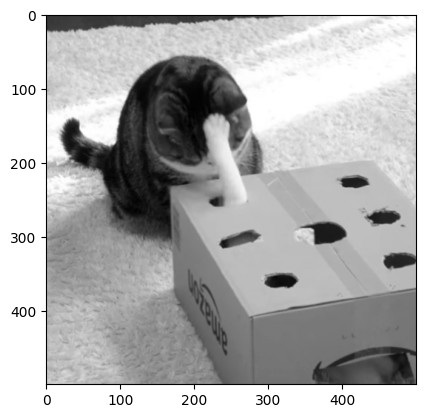

In [10]:
original_img = cv2.imread('kitty55.png',0)
plt.imshow(original_img,cmap='gray')
plt.show()

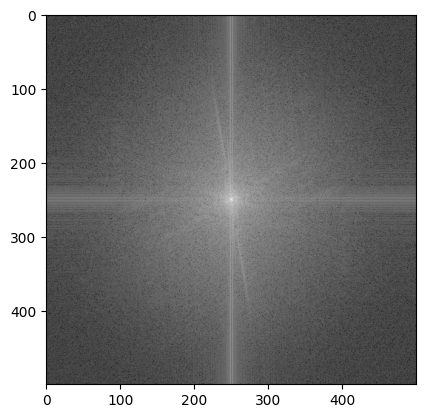

In [11]:
fft_orignal = np.fft.fft2(original_img)
fft_shift_original = np.fft.fftshift(fft_orignal)
# Show magnitude spectrum
magnitude_spectrum = np.abs(fft_shift_original)

# Optionally use log scale for visibility
plt.imshow(np.log1p(magnitude_spectrum), cmap="gray")
plt.show()

(500, 500)
c = 28.134810755841514, alpha = 0.9900000000137317


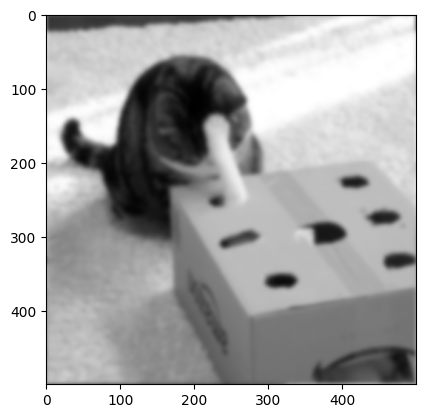

In [14]:
# test homework2_1
filtered_img = cv2.imread('kitty55.png',0)
print(filtered_img.shape)
out,c,alpha = homework2_1(filtered_img)
print(f"c = {c}, alpha = {alpha}")
plt.imshow(out,cmap='gray')
plt.show()


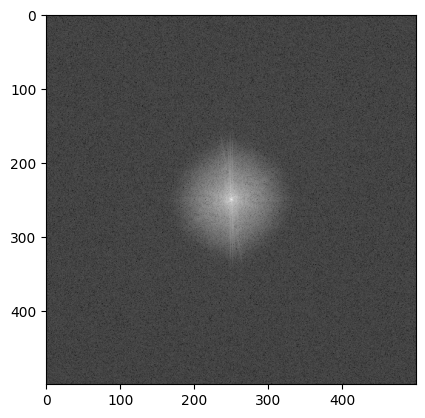

In [9]:
fft_filtered = np.fft.fft2(out)
fft_shift_filtered = np.fft.fftshift(fft_filtered)
# Show magnitude spectrum
magnitude_spectrum = np.abs(fft_shift_filtered)

# Optionally use log scale for visibility
plt.imshow(np.log1p(magnitude_spectrum), cmap="gray")
plt.show()

In [44]:
img_path = 'moodeng2.jpg'
median_ksize = 9
hp_sigma = 0.9
sharpen_amount = 2.0

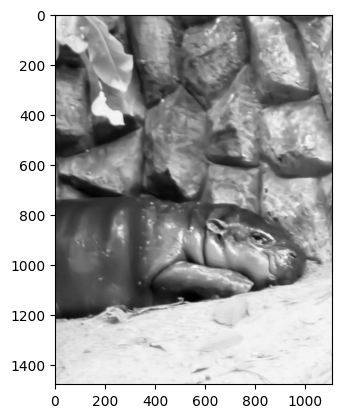

In [45]:
#2_2
original_img = cv2.imread(img_path,0)
plt.imshow(original_img,cmap='gray')
plt.show()

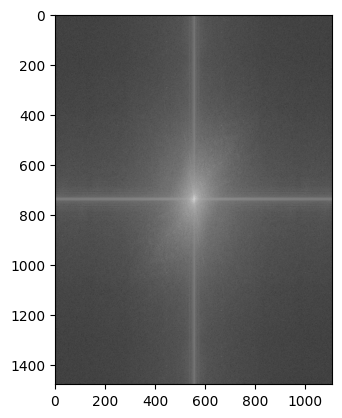

In [46]:
fft_orignal = np.fft.fft2(original_img)
fft_shift_original = np.fft.fftshift(fft_orignal)
magnitude_spectrum = np.abs(fft_shift_original)
plt.imshow(np.log1p(magnitude_spectrum), cmap="gray")
plt.show()

Energy is packed near the DC center → image is soft/low-frequency dominant.
No strong periodic spikes → notch/bandreject not needed.


In [47]:
bgr = cv2.imread(str(img_path))
assert bgr is not None, f"not found: {img_path}"
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB).astype(np.float32)/255.0

In [48]:
med = np.dstack([
    cv2.medianBlur((rgb[...,c]*255).astype(np.uint8), median_ksize).astype(np.float32)/255.0
    for c in range(3)
])

In [49]:
lp = cv2.GaussianBlur(med, ksize=(0,0), sigmaX=hp_sigma, sigmaY=hp_sigma)
hp = med - lp
sharp = np.clip(med + sharpen_amount * hp, 0, 1)

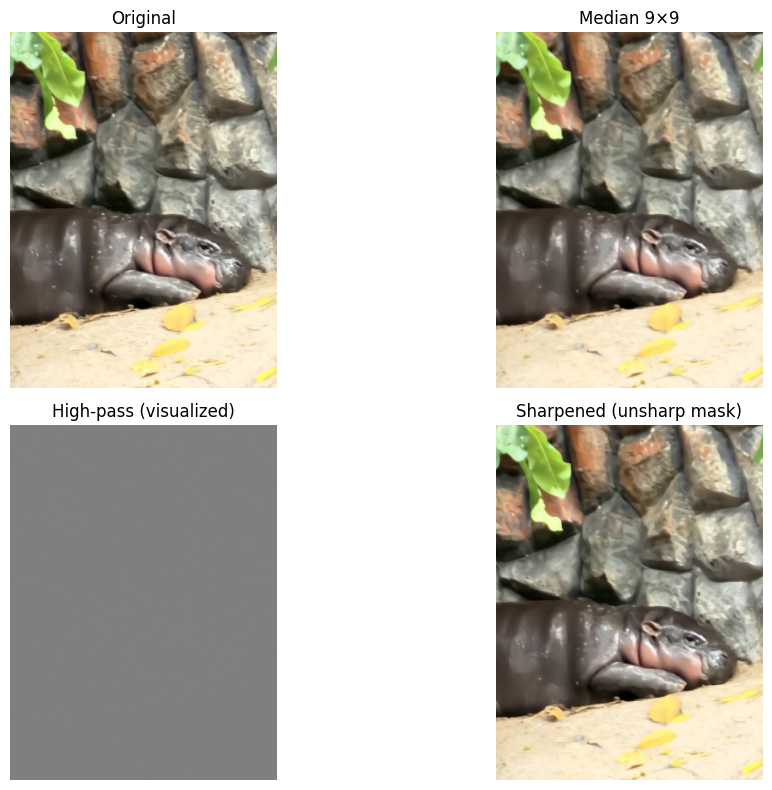

In [50]:
def show(ax, img, title):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.figure(figsize=(12,8))
axs = plt.subplot(2,2,1); show(axs, rgb, "Original")
axs = plt.subplot(2,2,2); show(axs, med, f"Median {median_ksize}×{median_ksize}")
axs = plt.subplot(2,2,3); show(axs, np.clip(hp*0.5+0.5,0,1), "High-pass (visualized)")
axs = plt.subplot(2,2,4); show(axs, sharp, "Sharpened (unsharp mask)")
plt.tight_layout()
plt.show()

# **Practice (Do not submit)**

## 4.

In [ ]:
# homework2_4 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.4
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim


def homework2_4(org_image,blur_image):
    # input -> org_image - a grayscale image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    #       -> blur_image - a degraded image with type -> np.ndarray, size of - (height, width) with dtype - uint8
    # output -> restored_image - restored image (grayscale) using wiener filter - type -> np.ndarray, size of - (height, width) with dtype - uint8
    #         -> SSIM - compared image

    # TO DO - Restore an image using wiener filter
    restored_image = np.zeros_like(org_image)
    SSIM = 0


    return restored_image, SSIM



# Do not add anything outside the function in the submission

In [ ]:
# test homework2_4
org_image = cv2.imread("clean_cat.png",0)
blur_image = cv2.imread("blurry_noisy_cat.png",0)
restored_image, SSIM = homework2_4(org_image,blur_image)
plt.imshow(blur_image,cmap='gray')
plt.show()
plt.imshow(restored_image,cmap='gray')
plt.title('SSIM ='+ str(SSIM))
plt.show()

## 5.

In [ ]:
!pip install PyWavelets

In [ ]:
# homework2_5 --> do not modify/delete this first line and do not add anything before this line
# import library for 2.5
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt
# you can add more library here



def homework2_5(rgb_image):
  # input -> rgb_image - type -> np.ndarray, size of - (height, width,3) with dtype - uint8
  # output -> blur_image - half blur image in Grayscale or RGB colors



  # TO DO : generate and return the right half blur image using Wavelet
  half_blur_image = np.zeros_like(rgb_image)


  return half_blur_image

# Do not add anything outside the function in the submission

In [ ]:
# test homework2_5
rgb = cv2.imread("moodeng.jpg")
blur_image = homework2_5(rgb[:,:,::-1])
plt.imshow(rgb[:,:,::-1])
plt.show()
plt.imshow(blur_image,cmap='gray')
plt.show()